## Exploratory Data Analysis of COVID-19 Dataset

This notebook is created for the purpose of exploratory data analysis on COVID-19 data repository operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

The repository is hosted [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

### Decide on the range of data we will use for analysis

Observing the repository we notice that the files are available from 1/22/2020. All timestamps are in UTC (GMT+0).

In [2]:
start_date = datetime(2020, 1, 22)
current_date = datetime.today()

delta_days = current_date - start_date
periods = delta_days.days

In [3]:
dates = pd.date_range(start_date, periods=periods, freq='D')

In [4]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

### Download the data from Git or Extract from Pickle Serialized object

In [7]:
from urllib.request import urlopen

data = pd.DataFrame()
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

i = 0
while i < periods:
    new_url = url + dates[i].strftime('%m-%d-%Y') + '.csv'
    print(new_url)
    temp = urlopen(new_url)
    temp_data = pd.read_csv(temp)
    data = data.append(temp_data)
    i = i+1


https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [8]:
# the below piece of code was written as reading multiple raw CSV files form Github is throwing below error intermittently
# "URLError: <urlopen error [SSL: KRB5_S_TKT_NYV] unexpected eof while reading (_ssl.c:1076)>"
# which I guess is used to do with session. I need to do a bit of research on this further to understand what is causing it.

#############################################

#import pickle

#with open('data_frame_pkl','wb') as f:
#    pickle.dump(data, f)
    
#with open('data_frame_pkl', 'rb') as f:
#    data = pickle.load(f)

In [9]:
data.shape

(31566, 17)

In [10]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see some of the columns are same across multiple CSV files. So let us combine them.

* Province/State and Province_State
* Last Update and Last_Update
* Latitude and Lat
* Longitude and Long

In [11]:
data['Country/Region'] = data['Country/Region'].combine_first(data['Country_Region'])
data['Last Update'] = data['Last Update'].combine_first(data['Last_Update'])
data['Latitude'] = data['Latitude'].combine_first(data['Lat'])
data['Longitude'] = data['Longitude'].combine_first(data['Long_'])

Let us convert the "Last Update" column to date format for plotting

In [12]:
data['Last Update'] = pd.to_datetime(data['Last Update']).dt.strftime('%Y-%m-%d')

Upon a careful observation of CSV files from the beginning, only Country/Region, Province/State, Last Update, Confirmed, Deaths and Recovered are the only columns reported out consistently. So let us keep only these columns and throw away others. In future, we will try to source datasets from Mid March so we can consider Longitude and Latitude.

In [13]:
required_cols = ['Country/Region','Province/State','Last Update','Confirmed','Deaths','Recovered']
covid_data = data[required_cols]
covid_data.head()

,Country/Region,Province/State,Last Update,Confirmed,Deaths,Recovered
0,Mainland China,Anhui,2020-01-22,1.0,NaN,NaN
1,Mainland China,Beijing,2020-01-22,14.0,NaN,NaN
2,Mainland China,Chongqing,2020-01-22,6.0,NaN,NaN
3,Mainland China,Fujian,2020-01-22,1.0,NaN,NaN
4,Mainland China,Gansu,2020-01-22,NaN,NaN,NaN


Now we have got the data in required format, let us plot some graphs.

### Plotting


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### 1. Total number of casee across countries

In [82]:
cdate = date.today()-timedelta(days=1)
cols = ['Confirmed','Deaths','Recovered']
s = covid_data[covid_data["Last Update"]==cdate.strftime('%Y-%m-%d')][cols].sum(axis = 0).astype(int)
s

Confirmed    653114
Deaths        30588
Recovered    131939
dtype: int64

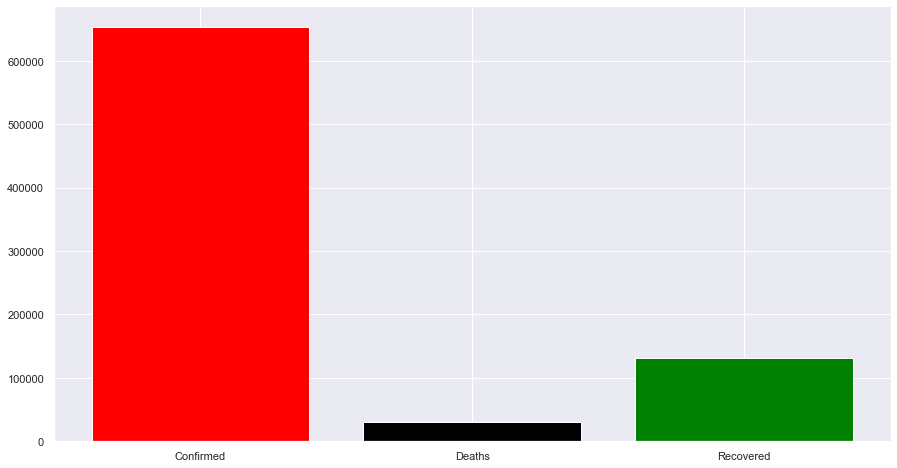

In [83]:
totals = [s['Confirmed'], s['Deaths'], s['Recovered']]
category = ('Confirmed', 'Deaths', 'Recovered')
y_pos = np.arange(len(category))

plt.figure(figsize=(15, 8))
plt.bar(y_pos, totals, color=['red', 'black', 'green'])
plt.xticks(y_pos, category)
plt.show()

#### 2. Cases by Country

In [84]:
s = covid_data[covid_data["Last Update"]==cdate.strftime('%Y-%m-%d')].groupby(['Country/Region']).sum()
s

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,110.0,4.0,2.0
Albania,197.0,10.0,31.0
Algeria,454.0,29.0,31.0
Andorra,308.0,3.0,1.0
Angola,5.0,0.0,0.0
...,...,...,...
Venezuela,119.0,2.0,39.0
Vietnam,174.0,0.0,21.0
West Bank and Gaza,98.0,1.0,18.0


As you can see above almost 177 countries have been infected with the virus. To make it visually better let us plot using top most infected countries.

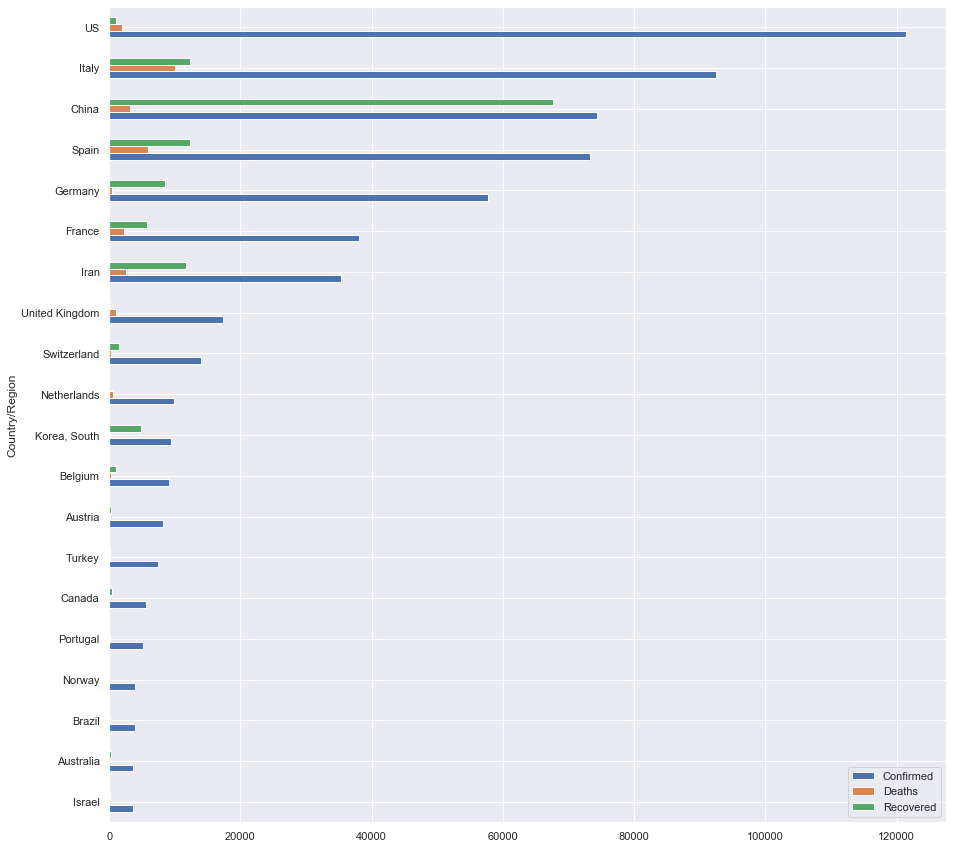

In [85]:
s = s.sort_values(by = ['Confirmed'], ascending = True)[-20:]
s.plot(kind='barh', figsize=(15, 15))

As you can see above

* US is the most infected country as there are more number of confirmed cases
* Italy is the country affected by more number of deaths due to virus
* China has most recovered cases

#### 3. Day Wise Confirmed Cases

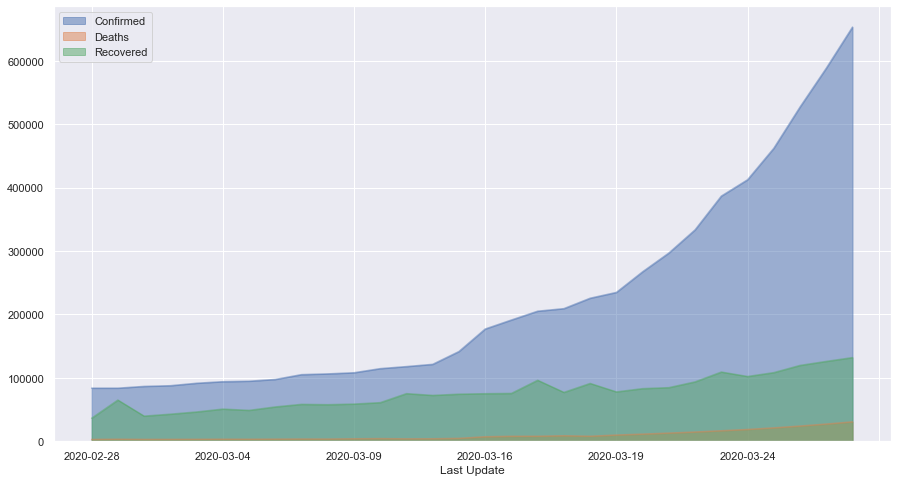

In [86]:
s = covid_data.groupby(['Last Update']).sum().sort_values(by=['Confirmed'], ascending=True)[-30:]
s.plot.area(stacked=False, figsize=(15,8))